# Step 1: Importing Libraries and Understanding Data

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from scipy.stats import skew
from scipy.stats import mode
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
# Read the dataset
os.chdir('D:/Imarticus/Supervised Learning/Logistic Regression/Data Shared by sir/Vaccine Usage Prediction/Dataset')
df=pd.read_csv('D:/Imarticus/Supervised Learning/Logistic Regression/Data Shared by sir/Vaccine Usage Prediction/Dataset/h1n1_vaccine_prediction.csv')
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [3]:
# Looking at shape of train data
df.shape

(26707, 34)

In [4]:
# Looking at the 1st five rows
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [5]:
# Looking at the last five rows
df.tail()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0


### Let's check the summary of data

In [6]:
# Let's look at some statistical information about our dataframe
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [7]:
# Let's look at statistical summary of categorical variables
df.describe(include='object')

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
count,26707,25300,26707,26707,22284,25299,24665,25244,26707
unique,5,4,4,2,3,2,2,3,3
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
freq,6843,10097,21222,15858,12777,13555,18736,13560,11645


In [8]:
# What kind of values stored in the columns?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

# Step 2 : Visualising Data 

C:\Users\sasai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sasai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sasai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sasai\anacond

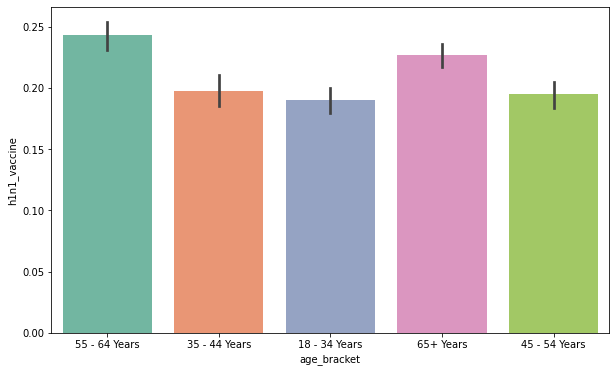

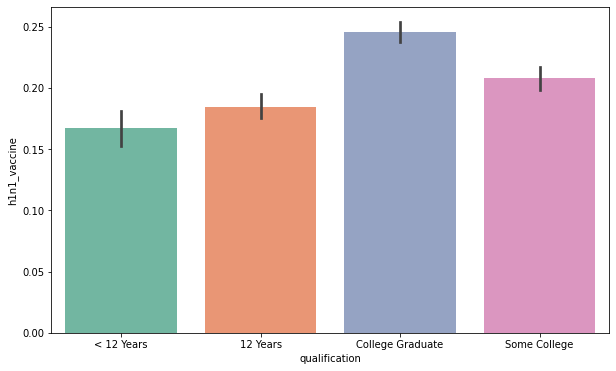

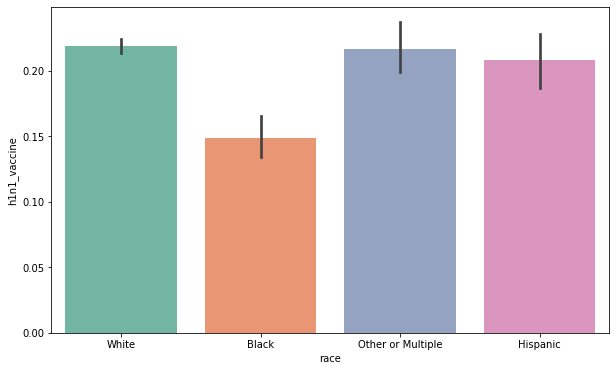

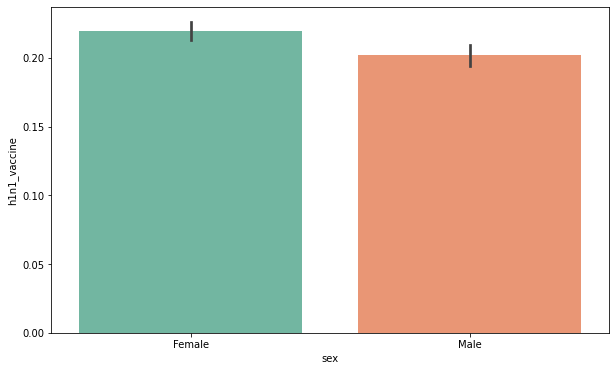

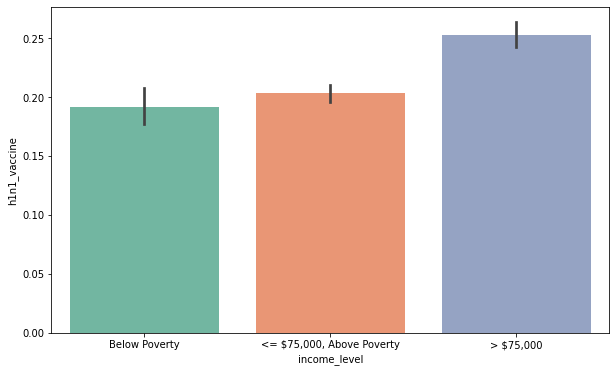

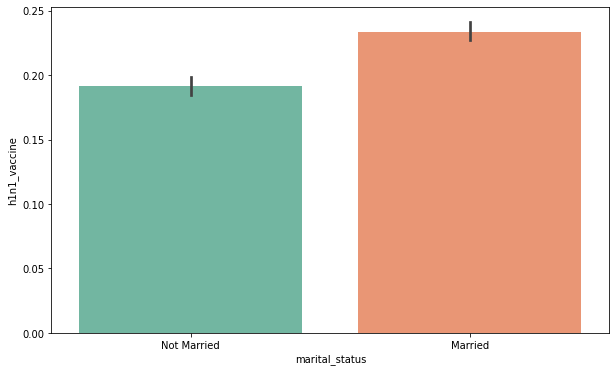

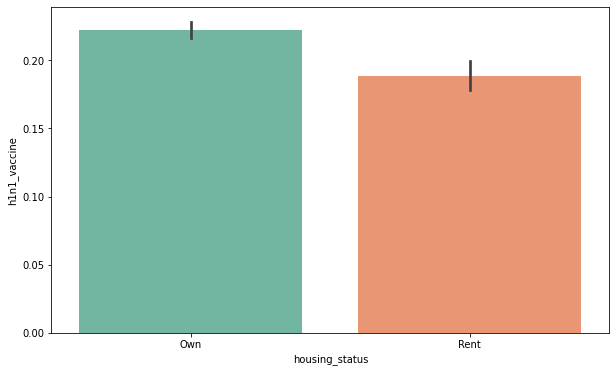

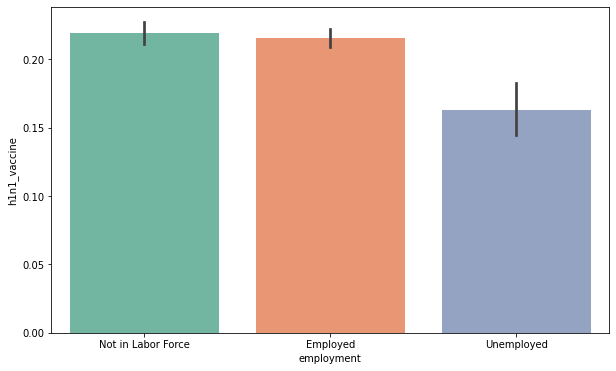

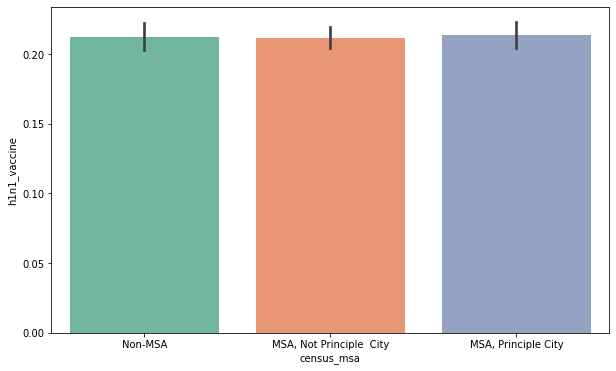

In [9]:
# Next check out categorical features
categorical_col = df.select_dtypes(include=['object']).columns

# This loop will help us to print all the graphs in one go..
for feature in categorical_col:
    plt.figure(figsize=(10,6))
    sns.barplot(feature,'h1n1_vaccine', data=df, palette='Set2')

### Observations

1. Age: It seems that aged people are more likely to take vaccine.
2. Qualification: It looks like more the educated people , more likely to take vaccine.
3. Race: People tends to take more vaccine which are White, Other or Multiple and Hispanic
4. Sex: Feamles are more likely to take vaccine
5. Income_level: People whose income is more than 75,000 are more likely to take vaccine.
6. Marital_status: Single people seems to take vaccine mostly.
7. Housing_status:People who has their own house are more likely to take vaccine.
8. Employment: People which are Not in labor force and which are employed takes vaccine mostly.
9. Census_msa: All people tends to take vaccine equally.

(array([21033.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  5674.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

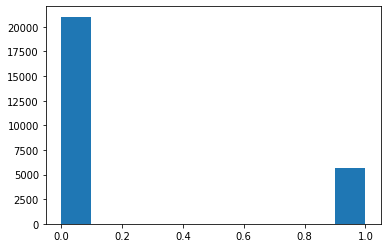

In [10]:
# Visualizing Target variable
plt.hist(df['h1n1_vaccine'])

In [11]:
# Separation of numeric variables
num = df.select_dtypes(include=np.number)

In [12]:
#imp_features = ['h1n1_worry','h1n1_awareness','has_health_insur','dr_recc_h1n1_vacc','is_h1n1_risky','is_h1n1_vacc_effective',
                #'is_seas_risky','dr_recc_seasonal_vacc','is_seas_vacc_effective','is_health_worker','h1n1_vaccine']

#sns.pairplot(df[imp_features],hue='h1n1_vaccine',palette='viridis', size=2.5)

In [13]:
# Check correlation
df.corr()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
unique_id,1.000000,0.017839,0.003425,-0.008475,0.009638,-0.006644,0.011105,0.004539,0.009011,0.007575,...,-0.012603,0.005912,0.000958,-0.002270,0.005935,-0.005291,0.009563,0.000187,-0.003726,-0.003280
h1n1_worry,0.017839,1.000000,0.062522,0.090301,0.233713,0.156032,0.293565,0.255031,0.246424,0.248016,...,-0.003655,0.239604,0.377033,0.360070,0.235136,0.333990,0.225731,-0.015658,0.050525,0.121929
h1n1_awareness,0.003425,0.062522,1.000000,-0.010836,0.088839,0.030050,0.089785,-0.048898,-0.068219,0.086162,...,0.119408,0.121009,0.073086,-0.019501,0.086103,0.076825,-0.062483,0.024874,0.050583,0.117951
antiviral_medication,-0.008475,0.090301,-0.010836,1.000000,0.049247,0.146261,0.064119,0.106287,0.127679,0.070868,...,-0.063988,0.030211,0.105163,0.079091,0.015003,0.085315,0.084305,0.044900,0.084822,0.040608
contact_avoidance,0.009638,0.233713,0.088839,0.049247,1.000000,0.064946,0.338130,0.227675,0.220348,0.335335,...,0.032662,0.112300,0.117851,0.131405,0.119554,0.129504,0.082942,0.019122,0.040328,0.047690
bought_face_mask,-0.006644,0.156032,0.030050,0.146261,0.064946,1.000000,0.083363,0.180907,0.163382,0.104335,...,-0.040257,0.037651,0.131165,0.107129,0.041556,0.110161,0.090009,0.013991,0.005826,0.070498
wash_hands_frequently,0.011105,0.293565,0.089785,0.064119,0.338130,0.083363,1.000000,0.195364,0.192619,0.365064,...,0.031919,0.136987,0.168711,0.150024,0.138517,0.172464,0.088029,0.009669,0.047764,0.074712
avoid_large_gatherings,0.004539,0.255031,-0.048898,0.106287,0.227675,0.180907,0.195364,1.000000,0.584085,0.253683,...,-0.059000,0.052299,0.126463,0.185924,0.078491,0.132865,0.135446,-0.031938,-0.009449,0.017822
reduced_outside_home_cont,0.009011,0.246424,-0.068219,0.127679,0.220348,0.163382,0.192619,0.584085,1.000000,0.267719,...,-0.061381,0.050748,0.125549,0.174834,0.067469,0.120237,0.138133,-0.027527,-0.009558,0.021768
avoid_touch_face,0.007575,0.248016,0.086162,0.070868,0.335335,0.104335,0.365064,0.253683,0.267719,1.000000,...,0.011024,0.104126,0.146080,0.131772,0.105798,0.143735,0.090097,-0.000553,0.023606,0.071648


<AxesSubplot:>

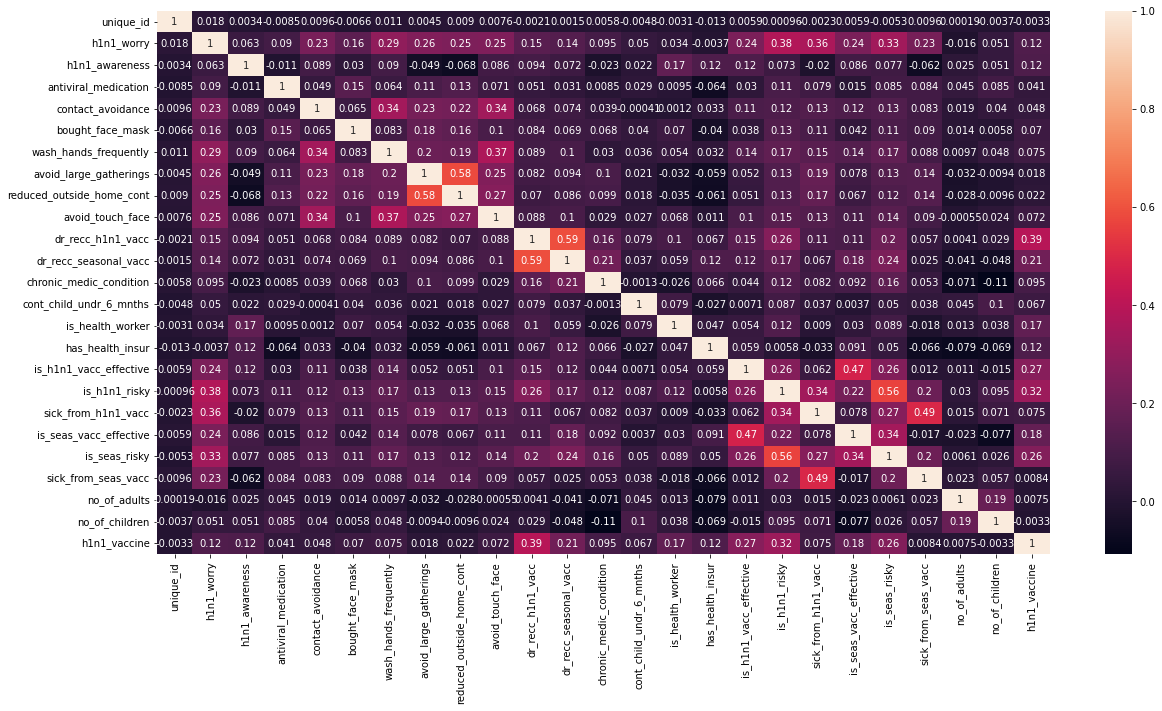

In [14]:
# Plotting Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(num.corr(), annot=True)

## Handling Miss Data 

In [15]:
# Checking for null values
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [16]:
# Now let us check how many missing values are there in the columns and their percentage

# Total missing values vaues in every column.
total_missing = df.isnull().sum()

# Calculate percentage
percentage = total_missing / df.isnull().count()

# Combine total and percentage values
NAs = pd.concat([total_missing,percentage], axis=1, keys=('Total','Percentage'))

# Getting columns where there are missing values
NAs[NAs.Total>0].sort_values(by='Total', ascending=False)

,Total,Percentage
has_health_insur,12274,0.459580
income_level,4423,0.165612
dr_recc_seasonal_vacc,2160,0.080878
dr_recc_h1n1_vacc,2160,0.080878
housing_status,2042,0.076459
employment,1463,0.054780
marital_status,1408,0.052720
qualification,1407,0.052683
chronic_medic_condition,971,0.036358
cont_child_undr_6_mnths,820,0.030704


In [17]:
# Replacing null values of numerical variables by their mean
for i in num:
    avg=df[i].mean(axis=0)
    df[i].replace(np.nan,avg,inplace=True)

In [18]:
df.isna().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                   0
sick_from_seas_vacc             0
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment    

In [19]:
df.select_dtypes(exclude='object').isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

In [20]:
df2 = df.select_dtypes(include=np.number)

In [21]:
df2.isna().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

In [22]:
# Separation of categoric variables
cat = df.select_dtypes(include='object')
cat

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City"
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City"
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA


In [23]:
df['age_bracket'].value_counts().index[0]

'65+ Years'

In [24]:
# Replacing null values of categoorical variables by thier mode
for i in cat:
    mode=df[i].value_counts().index[0]
    df[i].replace(np.nan,mode,inplace=True)

In [25]:
# Checking if null value any
df.isna().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [26]:
df.select_dtypes(include='object').isnull().sum()

age_bracket       0
qualification     0
race              0
sex               0
income_level      0
marital_status    0
housing_status    0
employment        0
census_msa        0
dtype: int64

In [27]:
# Creating dummy variables
cat_dummy=pd.get_dummies(cat)

In [28]:
# Combine numeric and dummy variables
merge_data=pd.concat([df2,cat_dummy],axis=1)

#  Step 3 : Splitting the data in Training and Test Set

In [29]:
from sklearn.model_selection import train_test_split
x=merge_data.drop(['h1n1_vaccine','unique_id'],axis=1)
y=merge_data['h1n1_vaccine']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=100)

In [30]:
x_train.shape, x_test.shape

((18694, 51), (8013, 51))

# Step 4 : Performing Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

C:\Users\sasai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Step 5 : Model Performance Metrics

In [32]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [33]:
print("Accuracy is:",accuracy)
print("F1 score is:",f1)
print("Precision score is:",precision)
print("Recall score is:",recall)
print("Roc_auc Score is: ",roc_auc)

Accuracy is: 0.83651566204917
F1 score is: 0.5253623188405797
Precision score is: 0.6688191881918819
Recall score is: 0.43257756563245825
Roc_auc Score is:  0.687963076646117


# Step 6 : Performing Logit Model

In [35]:
!pip install statsmodels

In [36]:
import statsmodels.api as sm

In [37]:
logit_model = sm.Logit(list(y_train),x_train)

In [38]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.384190
         Iterations 8


In [39]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                           Results: Logit
====================================================================================================
Model:                           Logit                       Pseudo R-squared:            0.260     
Dependent Variable:              y                           AIC:                         14462.1081
Date:                            2021-08-31 20:47            BIC:                         14846.0700
No. Observations:                18694                       Log-Likelihood:              -7182.1   
Df Model:                        48                          LL-Null:                     -9702.8   
Df Residuals:                    18645                       LLR p-value:                 0.0000    
Converged:                       1.0000                      Scale:                       1.0000    
No. Iterations:                  8.0000                                                             
----------------------------------------------------------------------------------------------------
                                        Coef.    Std.Err.     z    P>|z|      [0.025       0.975]   
----------------------------------------------------------------------------------------------------
h1n1_worry                             -0.0956      0.0287 -3.3286 0.0009       -0.1519      -0.0393
h1n1_awareness                          0.1076      0.0386  2.7845 0.0054        0.0319       0.1833
antiviral_medication                    0.2750      0.0928  2.9625 0.0031        0.0931       0.4569
contact_avoidance                      -0.0358      0.0540 -0.6638 0.5068       -0.1416       0.0699
bought_face_mask                        0.1452      0.0812  1.7881 0.0738       -0.0140       0.3045
wash_hands_frequently                   0.0539      0.0681  0.7912 0.4288       -0.0796       0.1873
avoid_large_gatherings                 -0.2184      0.0561 -3.8913 0.0001       -0.3284      -0.1084
reduced_outside_home_cont              -0.0033      0.0570 -0.0582 0.9536       -0.1151       0.1085
avoid_touch_face                        0.0304      0.0524  0.5804 0.5617       -0.0723       0.1330
dr_recc_h1n1_vacc                       2.0747      0.0637 32.5644 0.0000        1.9499       2.1996
dr_recc_seasonal_vacc                  -0.5859      0.0631 -9.2803 0.0000       -0.7096      -0.4622
chronic_medic_condition                 0.0876      0.0491  1.7824 0.0747       -0.0087       0.1838
cont_child_undr_6_mnths                 0.2835      0.0744  3.8092 0.0001        0.1376       0.4294
is_health_worker                        0.8255      0.0635 13.0052 0.0000        0.7011       0.9499
has_health_insur                        1.3448      0.1288 10.4421 0.0000        1.0924       1.5972
is_h1n1_vacc_effective                  0.6326      0.0298 21.2493 0.0000        0.5742       0.6909
is_h1n1_risky                           0.3746      0.0204 18.3210 0.0000        0.3345       0.4147
sick_from_h1n1_vacc                    -0.0191      0.0191 -0.9962 0.3191       -0.0566       0.0184
is_seas_vacc_effective                  0.0774      0.0268  2.8901 0.0039        0.0249       0.1299
is_seas_risky                           0.1382      0.0197  7.0044 0.0000        0.0995       0.1768
sick_from_seas_vacc                    -0.0637      0.0189 -3.3759 0.0007       -0.1006      -0.0267
no_of_adults                           -0.0089      0.0332 -0.2696 0.7875       -0.0739       0.0560
no_of_children                         -0.0086      0.0287 -0.2990 0.7649       -0.0649       0.0477
age_bracket_18 - 34 Years              -1.2164 570854.3726 -0.0000 1.0000 -1118855.2272 1118852.7944
age_bracket_35 - 44 Years              -1.2643 591667.3997 -0.0000 1.0000 -1159648.0585 1159645.5299
age_bracket_45 - 54 Years              -1.2276         nan     nan    nan           nan          nan
age_bracket_55 - 64 Years              -0.8894 363604.8

# Step 7 : Performing SGD

In [40]:
# Importing Required Liabraries
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [41]:
x_temp = x_train
x_std = StandardScaler().fit_transform(x_temp)
x = x_std
y = y_train

x_test_temp = x_test
x_test_std = StandardScaler().fit_transform(x_test_temp)
x_te = x_test_std
y_te = y_test

clf = SGDRegressor(shuffle=False, learning_rate='invscaling', max_iter=2500)
clf.fit(x,y)

y_pred = clf.predict(x_te)

print('h1n1_vaccine:'+str(clf.coef_))
print("Y intercept:"+str(clf.intercept_))

h1n1_vaccine:[-1.09781153e-02  1.03375394e-02  9.90860048e-03 -2.51867304e-04
 -9.18580255e-03  6.17846809e-03 -1.82568895e-02 -2.65181648e-03
  2.46115850e-04  1.37976688e-01 -3.68206514e-02  3.09922829e-03
  1.21661723e-02  4.99680082e-02  2.99407965e-02  6.63977667e-02
  7.10921864e-02 -5.10503423e-03  1.63651529e-03  2.89779659e-02
 -2.15722989e-02  1.35894438e-03 -9.53303403e-04 -1.01867536e-02
 -3.33095718e-03 -4.09648318e-03 -1.70648973e-03  1.72363584e-02
 -6.07734163e-03 -2.58116977e-03 -1.41880130e-03  8.18135851e-03
 -9.49769388e-03 -2.98144609e-04  1.17068584e-02 -3.96184275e-04
 -8.92812953e-03  8.92812953e-03 -1.01005018e-02 -5.32043987e-06
 -5.34606996e-03  1.22184858e-02  1.07332972e-02 -1.41475705e-02
 -1.02029192e-02 -2.41795704e-03  2.04730247e-03 -2.80810288e-03
 -2.11584635e-04  2.27780138e-03 -2.10970339e-03]
Y intercept:[0.21226963]


In [42]:
# Checking Mean Squared Error
Mean_Sq_Error = mean_squared_error(y_te, y_pred)
Mean_Sq_Error

0.12346645778272564